Muhammad Fathi Radithya // MC006D5Y1315

Submission Predictive Analysis Mobile Device Usage and User Behavior

### Import Library

* numpy: Library untuk komputasi numerik. Digunakan untuk operasi matematis seperti perhitungan array dan matriks secara efisien.
* pandas: Digunakan untuk manipulasi dan analisis data. Dalam proyek ini, digunakan untuk membaca dataset, mengecek struktur data, dan memproses data seperti handling missing values dan encoding.
* matplotlib.pyplot: Library visualisasi dasar di Python. Digunakan untuk membuat plot seperti histogram dan bar chart.
* seaborn: Merupakan library visualisasi yang dibangun di atas matplotlib dan menyediakan antarmuka yang lebih ramah dan grafik yang lebih menarik. Digunakan untuk EDA (Exploratory Data Analysis), termasuk visualisasi distribusi data, korelasi, dan outlier.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

### Data Loading

Pada tahap ini, dilakukan proses pemuatan dataset ke dalam environment untuk dianalisis dan diproses lebih lanjut.

* user_behavior_dataset.csv adalah file CSV yang berisi data perilaku penggunaan perangkat mobile oleh pengguna. Dataset ini diunduh dari Kaggle dan berisi informasi kuantitatif serta kategorikal yang relevan untuk analisis perilaku pengguna.
* pd.read_csv(...) adalah fungsi dari library pandas yang digunakan untuk membaca file CSV dan mengubahnya menjadi objek DataFrame.
* df adalah variabel yang digunakan untuk menyimpan hasil pembacaan dataset. Objek ini akan digunakan sebagai data utama sepanjang proyek untuk proses pembersihan, eksplorasi, modeling, hingga evaluasi.

Setelah data dimuat ke dalam df, kita dapat mulai memahami struktur dan kondisi awal dataset dengan menggunakan fungsi seperti df.info() dan df.describe().

In [2]:
df = pd.read_csv('user_behavior_dataset.csv')
df

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1


### Data Understanding

#### Deskripsi Variabel

Pada tahap ini, dilakukan eksplorasi awal terhadap data untuk memahami struktur dan isi dari dataset. Dataset terdiri dari 700 baris data dan 11 kolom fitur, yang mencakup informasi tentang penggunaan perangkat mobile oleh pengguna.

* User ID (int64): 	ID unik untuk masing-masing pengguna. Digunakan hanya sebagai identifikasi dan tidak relevan dalam proses modeling.
* Device Model (object): 	Jenis/model perangkat mobile yang digunakan oleh pengguna (Samsung Galaxy S21, iPhone 12, Google Pixel 5, OnePlus 9, Xiaomi Mi 11).
* Operating System (object): Sistem operasi perangkat (Android atau iOS).
* App Usage Time (min/day) (int64): Total waktu rata-rata pengguna mengakses aplikasi per hari, dalam satuan menit.
* Screen On Time (hours/day) (float64): Rata-rata waktu layar menyala per hari, dalam satuan jam. Mewakili total waktu aktif penggunaan perangkat.
* Battery Drain (mAh/day) (int64): Konsumsi daya baterai rata-rata per hari, dalam satuan mAh (milliampere-hour).
* Number of Apps Installed (int64): Jumlah total aplikasi yang terinstal pada perangkat pengguna.
* Data Usage (MB/day) (int64): Konsumsi data internet rata-rata per hari, dalam satuan megabyte (MB).        
* Age (int64): Usia pengguna dalam tahun.                        
* Gender (object): Jenis kelamin pengguna (Male/Female).                     
* User Behavior Class (int64): 	Kelas perilaku pengguna yang merupakan target label untuk model klasifikasi. Nilai ini menunjukkan tipe perilaku pengguna berdasarkan pola penggunaan perangkat.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [4]:
df.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


#### Menangani Missing Value

Data yang mengandung nilai kosong (missing values) dapat mengganggu proses analisis dan pelatihan model machine learning. Oleh karena itu, perlu dilakukan identifikasi terhadap kolom-kolom yang memiliki nilai kosong.

* df.isnull(): Mengembalikan DataFrame boolean dengan nilai True pada sel yang kosong (missing) dan False untuk sel yang tidak kosong.
* sum(): Menghitung jumlah True pada setiap kolom, sehingga diperoleh total nilai kosong per kolom.

Jumlah hasil per kolom menunjukkan nilai 0, menandakan dataset lengkap.

In [5]:
# 1. Cek missing values
print("Jumlah Missing Values per Kolom:")
missing_counts = df.isnull().sum()
print(missing_counts)

Jumlah Missing Values per Kolom:
User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64


#### Menangani Duplicate Value

Data duplikat adalah baris data yang identik secara keseluruhan dengan baris lain. Jika tidak ditangani, keberadaan duplikat dapat mempengaruhi akurasi model dalam training.

* df.duplicated(): Mengembalikan Series boolean yang bernilai True untuk setiap baris yang merupakan duplikat dari baris sebelumnya, dan False jika tidak.
* sum(): Menjumlahkan seluruh nilai True (baris duplikat) untuk mengetahui total jumlah data yang duplikat.
* df[duplicate_rows].head(): Menampilkan contoh baris data yang terdeteksi sebagai duplikat (jika ada) agar bisa diperiksa secara manual.

Hasil jumlah baris duplikat menunjukkan 0, menunjukkan bahwa tidak ada data yang terduplikat.

In [6]:
# 1. Cek jumlah baris duplikat
duplicate_rows = df.duplicated()
total_duplicates = duplicate_rows.sum()
print(f"Jumlah baris duplikat: {total_duplicates}")

# 2. Tampilkan contoh duplikat (jika ada)
if total_duplicates > 0:
    print("\nContoh baris duplikat:")
    print(df[duplicate_rows].head())

Jumlah baris duplikat: 0


#### Menangani Outliers

Outlier adalah nilai ekstrem yang secara signifikan berbeda dari sebagian besar data lainnya. Jika tidak ditangani, outlier dapat mempengaruhi hasil analisis serta menurunkan kinerja model.

1. Boxplot digunakan untuk visualisasi, menunjukkan distribusi data berdasarkan lima nilai ringkasan: minimum, Q1 (kuartil pertama), median, Q3 (kuartil ketiga), dan maksimum.
2. Metode IQR digunakan untuk mendeteksi dan menghapus outlier dari fitur numerikal.
  * Mendefinisikan Q1 dan Q3 menggunakan quantile(), dan kemudian menetapkan IQR dengan menguringi nilai Q3 dan Q1.
  * Nilai outlier ditentukan jika dibawah batas minimum, Q1 - 1.5 × IQR, atau melebihi batas maksimum Q3 + 1.5 × IQR.

Berdasarkan plot, tidak ada titik data yang keluar dari batas minimum dan maksimum, hasil shape masih menampilkan 700 baris, menandakan tidak ada data outlier.


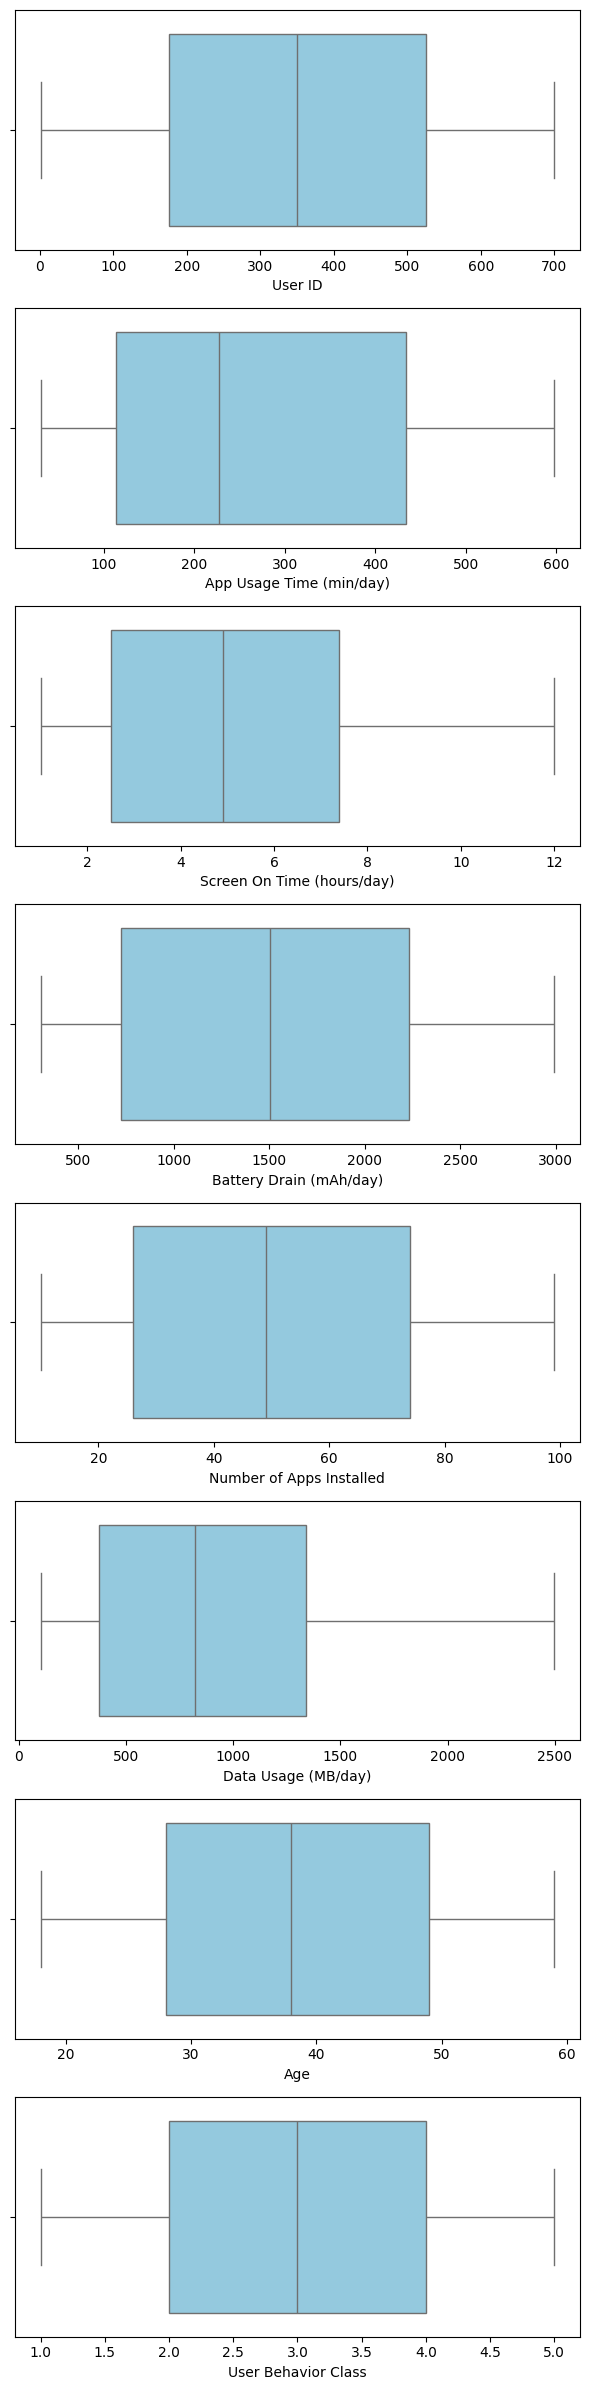

In [7]:
# 1. Ambil kolom numerik
num_cols = df.select_dtypes(include='number').columns

# 2. Buat boxplot untuk tiap kolom numerik
plt.figure(figsize=(6, len(num_cols) * 3))
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 1, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.tight_layout()

plt.show()

In [8]:
# Ambil hanya kolom numerikal
numeric_cols = df.select_dtypes(include='number').columns

# Hitung Q1, Q3, dan IQR hanya untuk kolom numerikal
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Buat filter untuk menghapus baris yang mengandung outlier di kolom numerikal
filter_outliers = ~((df[numeric_cols] < (Q1 - 1.5 * IQR)) |
                    (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Terapkan filter ke dataset asli (termasuk kolom non-numerikal)
df = df[filter_outliers]

# Cek ukuran dataset setelah outlier dihapus
df.shape

(700, 11)

#### EDA - Univariate Analysis

Univariate analysis adalah teknik eksplorasi data yang berfokus pada analisis satu variabel, baik untuk data kategorikal maupun numerikal. Univariate analysis dilakukan untuk mengeneali karakteristik dasar setiap fitur, dan mengidentifikasi potensi masalah seperti ketidakseimbangan kelas, skewed distribution, atau nilai-nilai anomali.

1. Kategorikal:
  * Device Model: Terdapat 5 kategori model, dari countplot dapat dilihat bahwa kelimanya memiliki jumlah yang seimbang, tiap model berkisar 19-20.9%.
  * Operating System: Terdapat 2 kategori, iOS dan Android, dengan perbandingan 1:4 (20.9% dan 79.1%), terhitung lazim, dikarenakan model iOS hanya iPhone 12.
  * Gender: Terdiri dari 2 kategori, Male dan Female. Memiliki perbandingan jumlah yang setimbang (52% dan 48%).

2. Numerikal:
  * Rentang 'User Behavior Class' terlihat rata untuk tiap kelas.
  * Data numerik lainnya memiliki kecenderungan right-skewed.

In [9]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Fitur Numerik:", numerical_features)
print("Fitur Kategorikal:", categorical_features)

Fitur Numerik: ['User ID', 'App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)', 'Number of Apps Installed', 'Data Usage (MB/day)', 'Age', 'User Behavior Class']
Fitur Kategorikal: ['Device Model', 'Operating System', 'Gender']


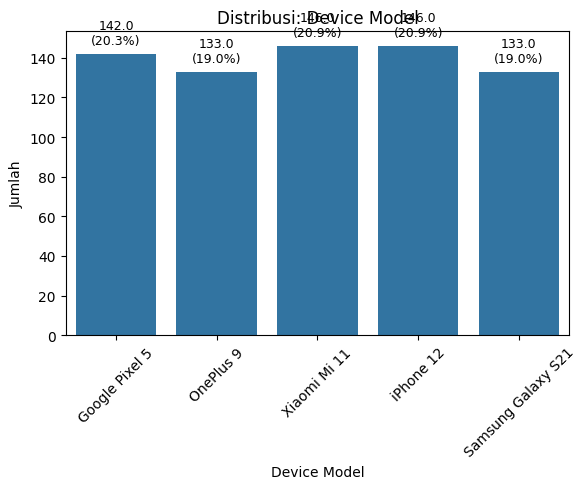

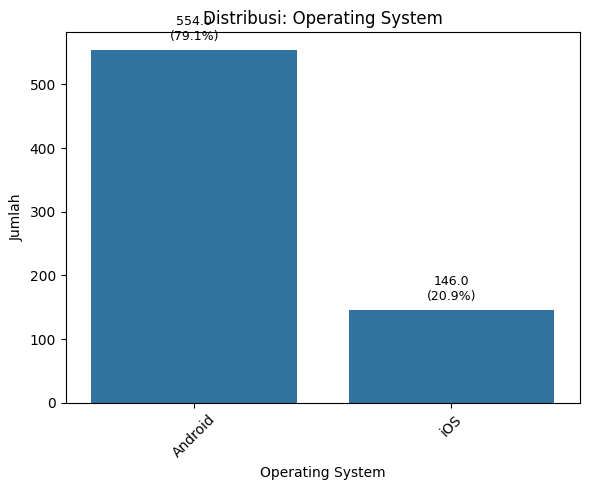

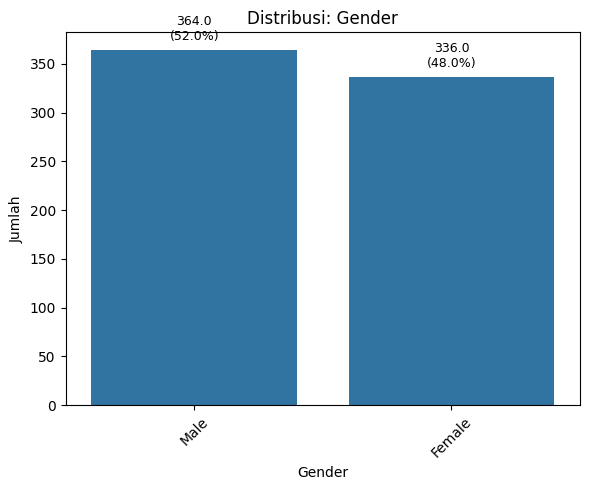

In [10]:
# Buat countplot untuk setiap fitur kategorikal dengan anotasi jumlah dan persentase
for col in categorical_features:
    plt.figure(figsize=(6, 5))
    ax = sns.countplot(data=df, x=col)

    total = len(df[col])

    for p in ax.patches:
        height = p.get_height()
        percentage = 100 * height / total
        ax.annotate(f'{height}\n({percentage:.1f}%)',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    fontsize=9, color='black',
                    xytext=(0, 5), textcoords='offset points')

    plt.title(f'Distribusi: {col}')
    plt.xlabel(col)
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

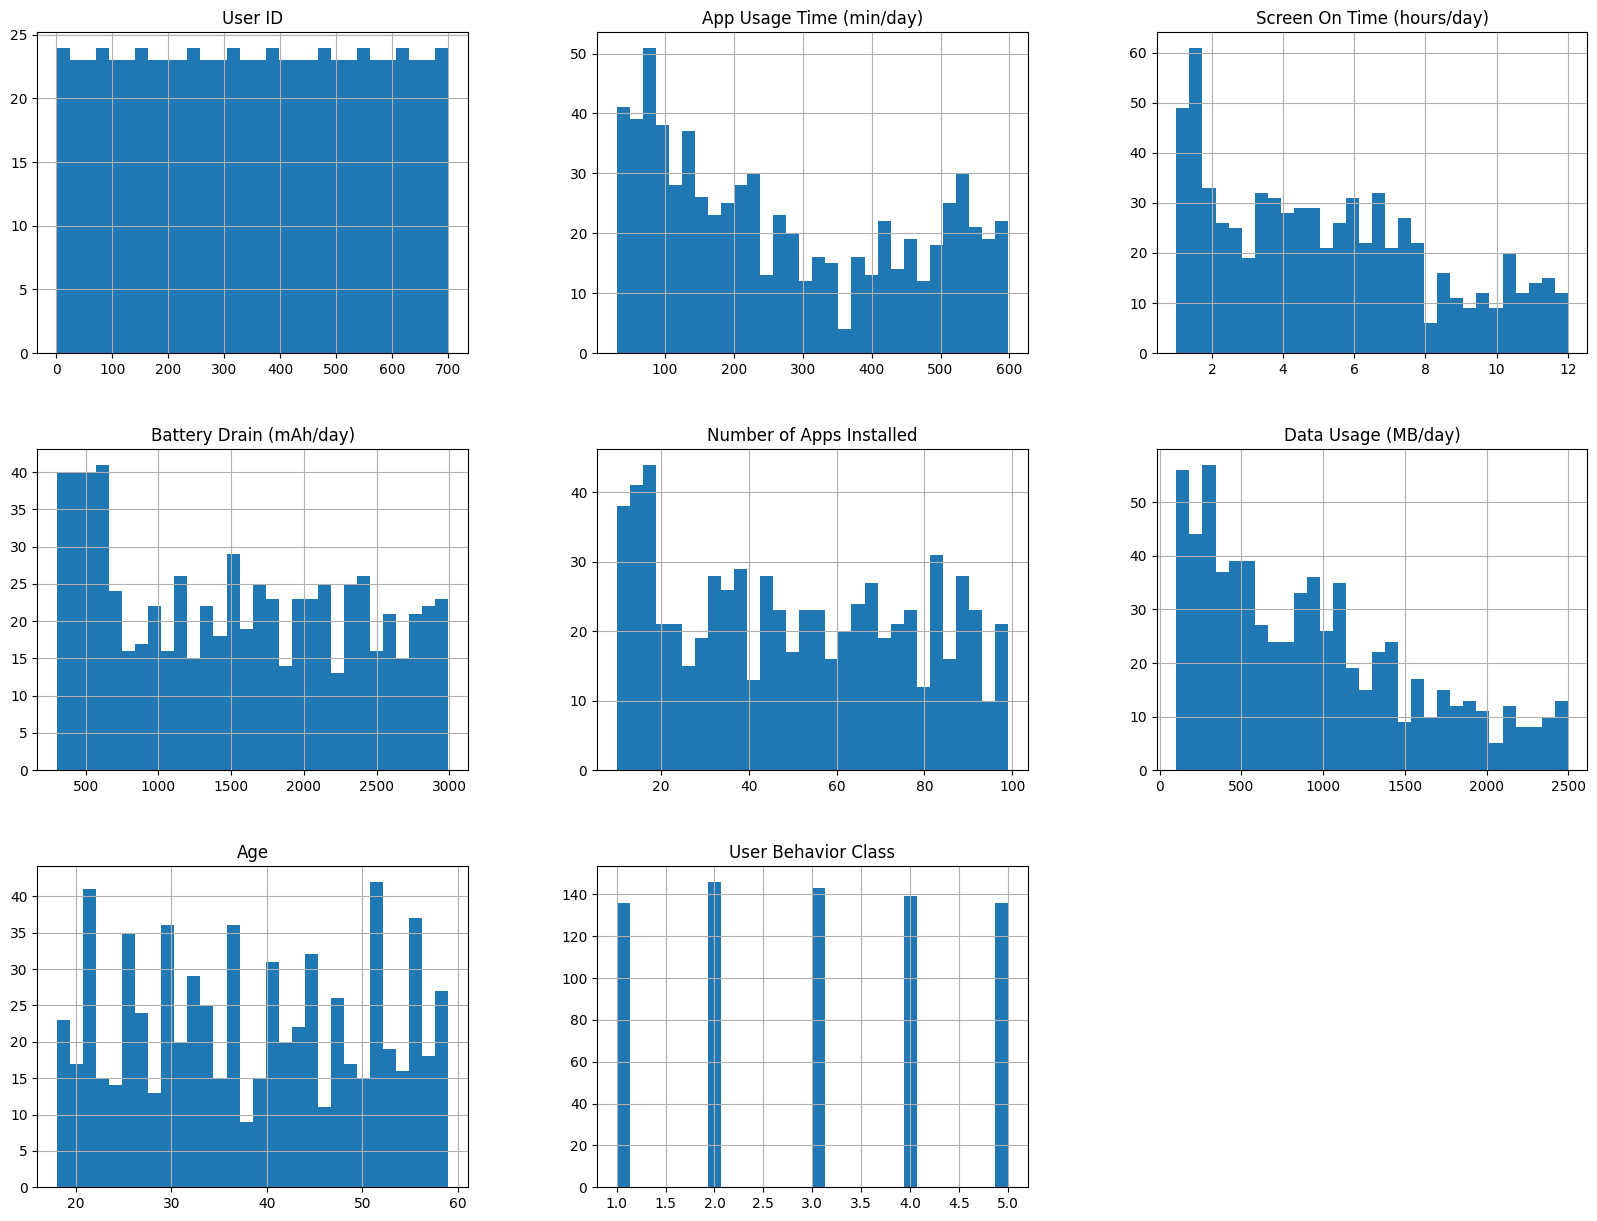

In [11]:
# Buat histogram atau distplot untuk setiap fitur numerik
df.hist(bins=30, figsize=(20,15))
plt.show()

#### EDA - Multivariate Analysis

Multivariate analysis adalah eksplorasi hubungan antara dua atau lebih fitur dalam dataset. Tujuan dari analisis ini adalah untuk:
* Menemukan pola atau hubungan antar fitur.
* Mengidentifikasi potensi fitur yang informatif untuk model prediktif.
* Mendeteksi adanya kelompok atau segmentasi pengguna berdasarkan kombinasi fitur.



1. Perbandingan target 'User Class Behavior' dengan fitur kategorikal.

* Pada fitur 'Device Model', rata-rata cenderung rata, berkisar antra 2.92 dan 3.10. Sehingga fitur tidak terlalu menghasilkan bias pada 'User Class Behavior'.
* Pada fitur 'Operating Systems', kedua label memiliki nilai yang mirip, berkisar antra 2.96 dan 3.10. Sehingga fitur tidak menghasilkan bias pada 'User Class Behavior'.
* Pada fitur 'Gender', kedua label memiliki nilai yang sama, 2.99. Sehingga fitur tidak menghasilkan bias pada 'User Class Behavior'.

<ipython-input-12-ad3a80082272>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=col, y="User Behavior Class", data=mean_values, palette="Set3")


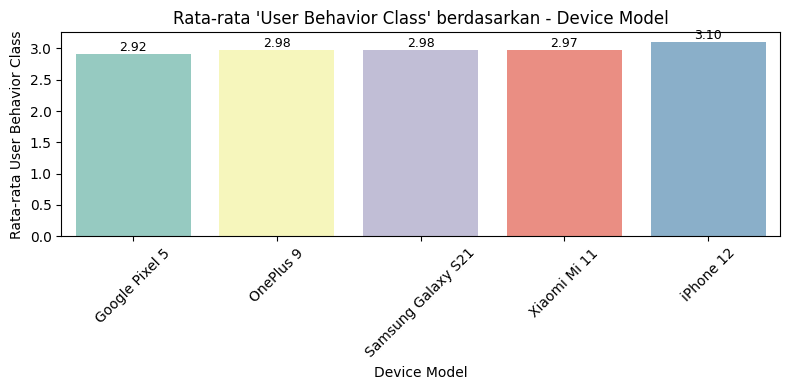

<ipython-input-12-ad3a80082272>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=col, y="User Behavior Class", data=mean_values, palette="Set3")


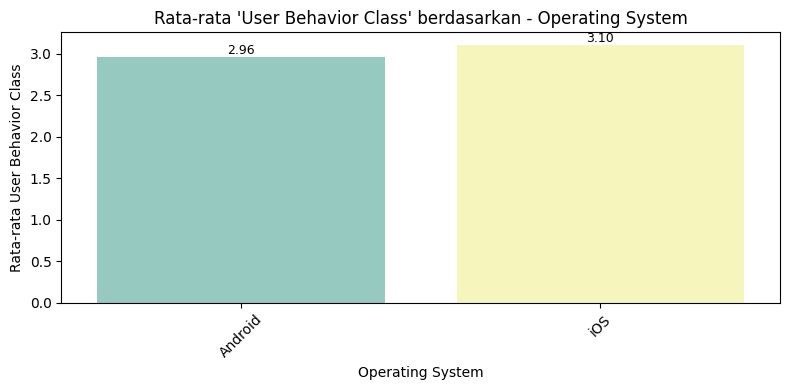

<ipython-input-12-ad3a80082272>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=col, y="User Behavior Class", data=mean_values, palette="Set3")


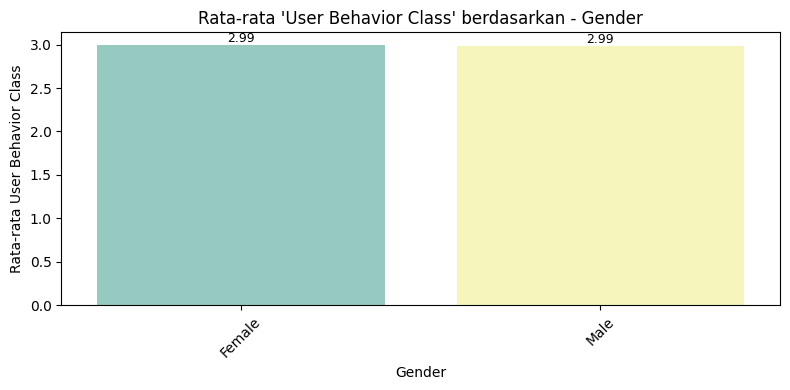

In [12]:
# Ambil fitur kategorikal
cat_features = df.select_dtypes(include='object').columns.to_list()

# Loop visualisasi dengan anotasi
for col in cat_features:
    plt.figure(figsize=(8, 4))

    # Hitung rata-rata User Behavior Class per kategori
    mean_values = df.groupby(col)['User Behavior Class'].mean().reset_index()

    # Buat barplot
    ax = sns.barplot(x=col, y="User Behavior Class", data=mean_values, palette="Set3")
    plt.title(f"Rata-rata 'User Behavior Class' berdasarkan - {col}")
    plt.ylabel("Rata-rata User Behavior Class")
    plt.xlabel(col)
    plt.xticks(rotation=45)

    # Tambahkan anotasi angka di atas bar
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}',  # tampilkan 2 angka desimal
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()

2. Perbandingan target 'Battery Drain' dengan fitur kategorikal.

* Pada fitur 'Device Model', rata-rata cenderung rata, berkisar antra 1476 dan 1590 mAh. Pengguna iPhone 12 cenderung menggunakan baterai lebih dibanding model-model lainnya.
* Pada fitur 'Operating Systems', kedua label memiliki nilai yang mirip, 1476 dan 1590 mAh. Pengguna iOS cenderung menggunakan baterai lebih dibanding Android.
* Pada fitur 'Gender', kedua label memiliki nilai serupa, 1520 dan 1530 mAh. Kedua jenis menggunakan tingkat baterai yang sama.

<ipython-input-13-9feefb458c72>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=col, y='Battery Drain (mAh/day)', data=mean_values, palette="Set2")


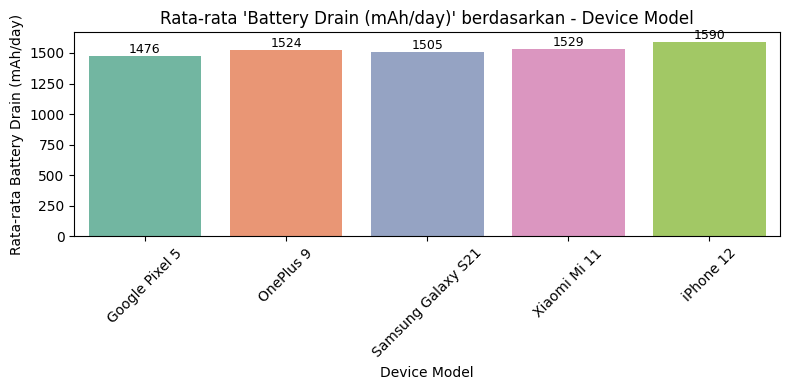

<ipython-input-13-9feefb458c72>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=col, y='Battery Drain (mAh/day)', data=mean_values, palette="Set2")


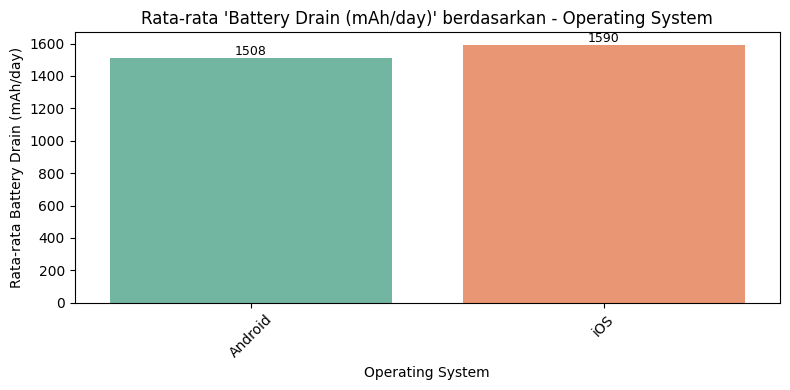

<ipython-input-13-9feefb458c72>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=col, y='Battery Drain (mAh/day)', data=mean_values, palette="Set2")


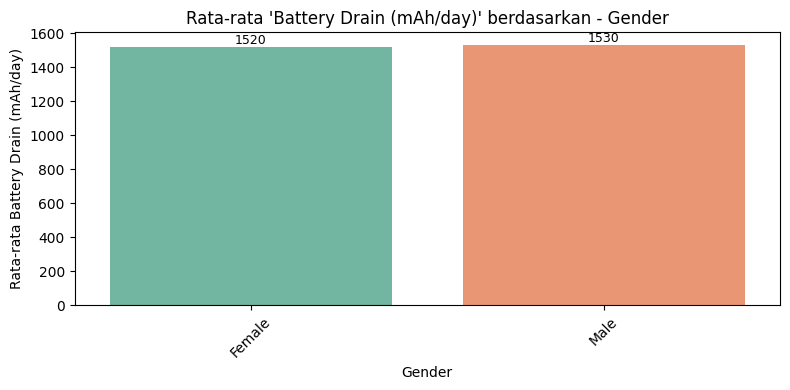

In [13]:
# Ambil fitur kategorikal
cat_features = df.select_dtypes(include='object').columns.to_list()

# Loop visualisasi per kategori terhadap Battery Drain
for col in cat_features:
    plt.figure(figsize=(8, 4))

    # Hitung rata-rata Battery Drain per kategori
    mean_values = df.groupby(col)['Battery Drain (mAh/day)'].mean().reset_index()

    # Buat barplot
    ax = sns.barplot(x=col, y='Battery Drain (mAh/day)', data=mean_values, palette="Set2")
    plt.title(f"Rata-rata 'Battery Drain (mAh/day)' berdasarkan - {col}")
    plt.ylabel("Rata-rata Battery Drain (mAh/day)")
    plt.xlabel(col)
    plt.xticks(rotation=45)

    # Tambahkan anotasi nilai di atas setiap bar
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.0f}',  # dibulatkan ke bilangan bulat
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()

4. Pairplot digunakan untuk melihat keseluruhan hubungan antara semua fitur numerik dalam dataset. Dari plot dapat mengambil hubungan numerik yang kuat. Sebagai contoh, semakin tinggi 'App Usage Time (min/day)' dan 'Screen On Time (hours/day)' cenderung terdapat pada User Behavior Class yang tinggi juga.

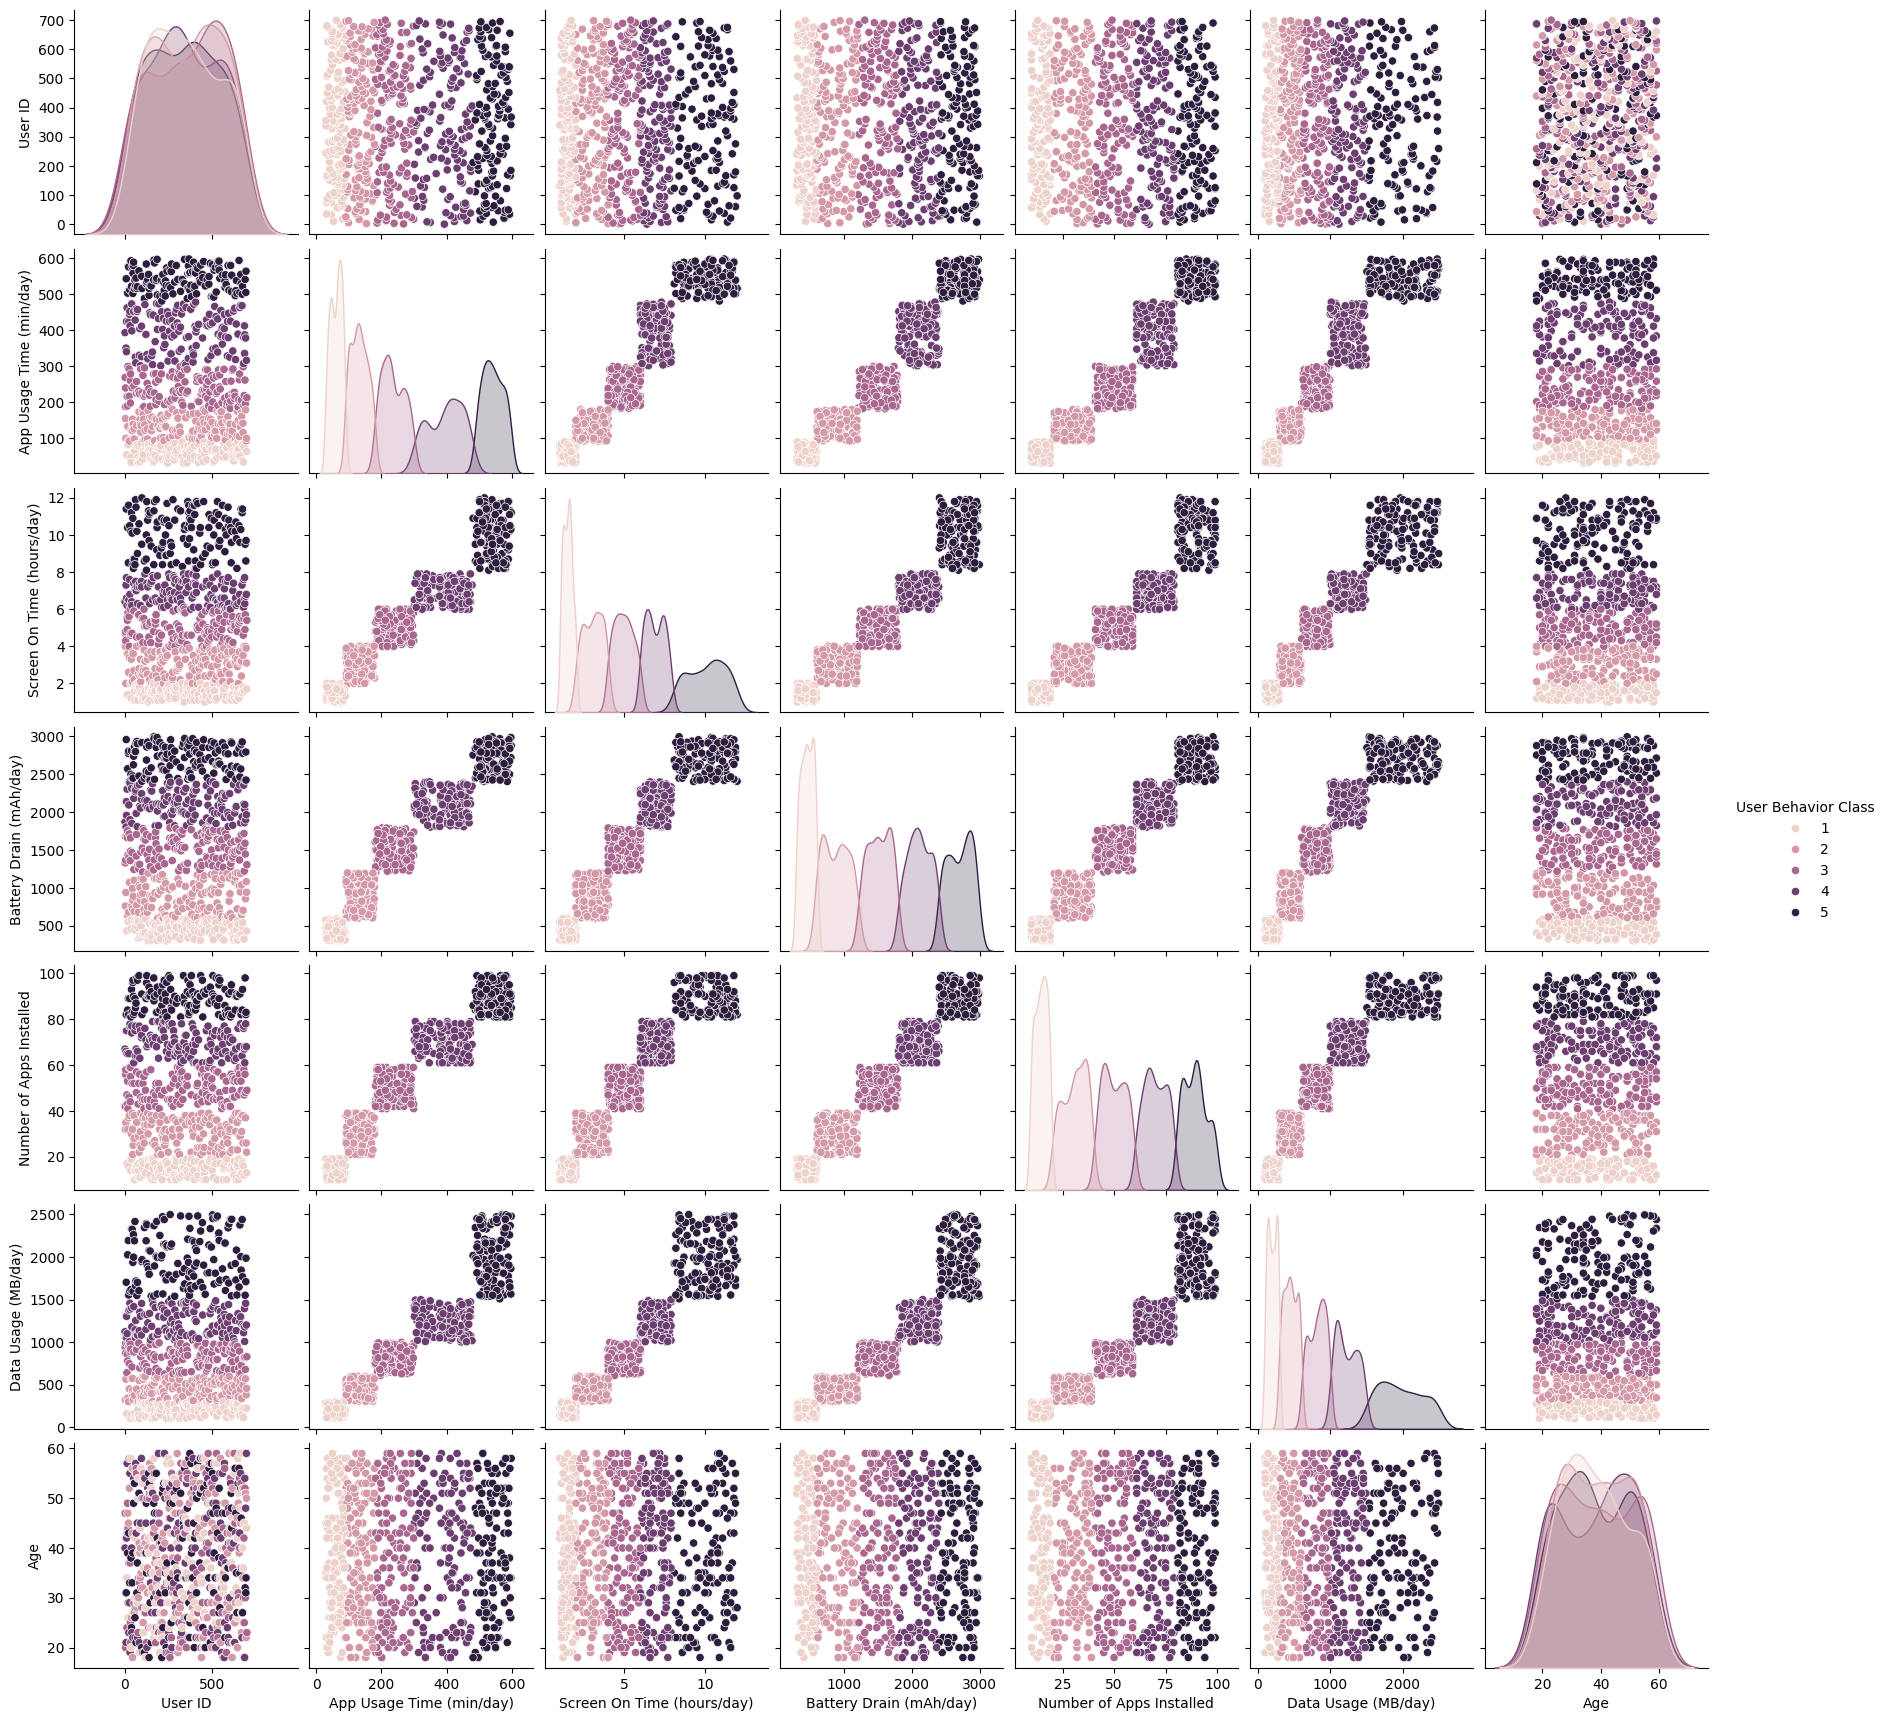

In [14]:
sns.pairplot(df, vars=['User ID', 'App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)', 'Number of Apps Installed', 'Data Usage (MB/day)', 'Age'], hue='User Behavior Class')
plt.show()

5. Heatmap digunakan untuk mengukur korelasi antara dua variabel numerik, dengan nilai berkisar dari:
* +1.0 → korelasi positif sempurna
* 0.0 → tidak ada korelasi
* –1.0 → korelasi negatif sempurna

Hampir semua fitur numerik memiliki korelasi tinggi >0.9, kecuali User ID dan Age, menandakan kedua variable tidak memiliki kontribusi prediktif yang dalam dataset.


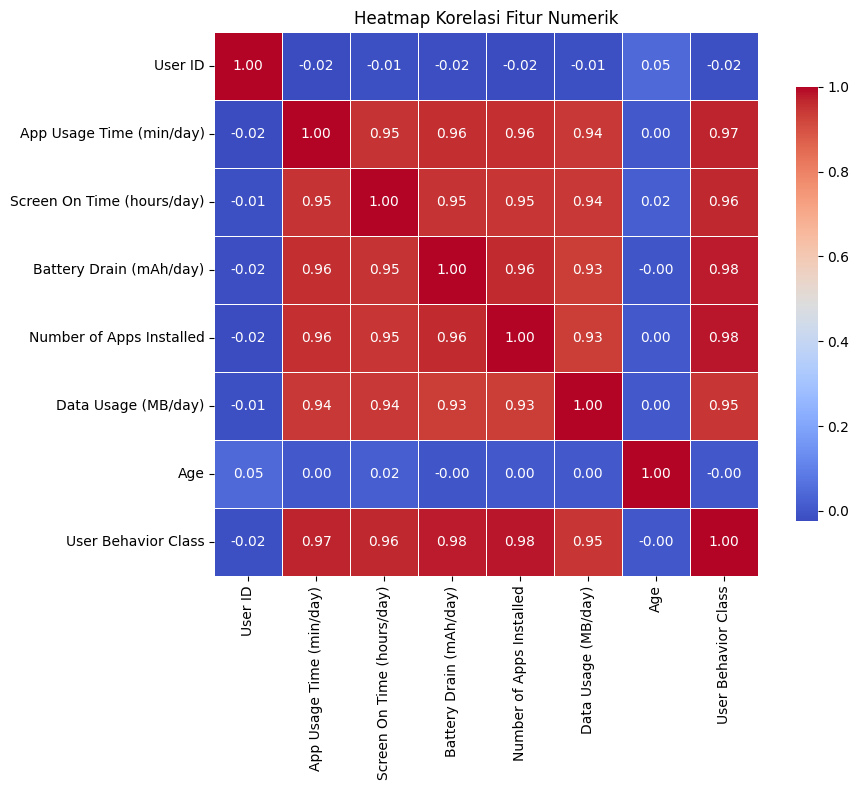

In [15]:
# Ambil hanya kolom numerik
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Hitung korelasi
corr_matrix = numerical_df.corr()

# Buat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Heatmap Korelasi Fitur Numerik')
plt.tight_layout()
plt.show()

### Data Preparation

Data preparation merupakan tahapan dalam proses pengembangan model, dimana kita melakukan proses transformasi pada data sehingga menjadi bentuk yang cocok untuk proses pemodelan. Untuk data preparation, dilakukan beberapa tahap.
1. Menghapus kolom yang tidak diperlukan.
2. Melakukan encoding pada data kategorikal (One-Hot Encoding).
3. Data splitting (80% untuk training, 20% untuk testing).
4. Standarisasi (Standardscaler).

In [16]:
# Drop kolom yang tidak digunakan
columns_to_drop = ['User ID']
df = df.drop(columns=columns_to_drop)

In [17]:
# One-hot encode semua kolom bertipe object
df = pd.get_dummies(df, drop_first=True)

# Tampilkan hasil
print(df.head())
print("\nShape dataset setelah one-hot encoding:", df.shape)

   App Usage Time (min/day)  Screen On Time (hours/day)  \
0                       393                         6.4   
1                       268                         4.7   
2                       154                         4.0   
3                       239                         4.8   
4                       187                         4.3   

   Battery Drain (mAh/day)  Number of Apps Installed  Data Usage (MB/day)  \
0                     1872                        67                 1122   
1                     1331                        42                  944   
2                      761                        32                  322   
3                     1676                        56                  871   
4                     1367                        58                  988   

   Age  User Behavior Class  Device Model_OnePlus 9  \
0   40                    4                   False   
1   47                    3                    True   
2   42           

In [18]:
df

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class,Device Model_OnePlus 9,Device Model_Samsung Galaxy S21,Device Model_Xiaomi Mi 11,Device Model_iPhone 12,Operating System_iOS,Gender_Male
0,393,6.4,1872,67,1122,40,4,False,False,False,False,False,True
1,268,4.7,1331,42,944,47,3,True,False,False,False,False,False
2,154,4.0,761,32,322,42,2,False,False,True,False,False,True
3,239,4.8,1676,56,871,20,3,False,False,False,False,False,True
4,187,4.3,1367,58,988,31,3,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,92,3.9,1082,26,381,22,2,False,False,False,True,True,True
696,316,6.8,1965,68,1201,59,4,False,False,True,False,False,True
697,99,3.1,942,22,457,50,2,False,False,False,False,False,False
698,62,1.7,431,13,224,44,1,False,True,False,False,False,True


Pemisahan label fitur dan target dan Data Splitting, yang dibagi menjadi 80% untuk training dan 20% untuk testing.

In [19]:
from sklearn.model_selection import train_test_split

X = df.drop(['User Behavior Class'],axis =1)
y = df['User Behavior Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [20]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 700
Total # of sample in train dataset: 560
Total # of sample in test dataset: 140


Standarisasi dilakukan untuk meningkatkan performa model, serta menghilangkan bias terhadap data dengan scaling yang tinggi, seperti 'Battery Drain (mAh/day)'

In [21]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)', 'Number of Apps Installed', 'Data Usage (MB/day)']

scaler = StandardScaler()

scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day)
518,1.721239,1.065407,1.547690,1.354878,1.400752
344,-0.080781,0.177715,-0.256722,0.051023,-0.132823
252,1.432235,1.722956,1.155160,1.801914,1.365934
332,-0.449119,0.243469,0.298954,-0.209748,-0.031534
563,-1.270794,-1.203140,-1.322686,-1.513603,-1.042839


In [22]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

<ipython-input-22-69700ad92bf9>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.52290316 -0.06944779 -0.73812186  1.53423662 -1.15745983 -1.06112543
 -1.32746171 -0.4377852   1.15456575  1.2792338   0.87689601 -0.87412336
  1.26223361  0.96756368 -1.11212599 -0.23944967  1.36423474 -1.16879329
  0.63889338  1.61357083  0.16288811 -0.83445626 -0.68712129 -0.31311715
 -1.01012487 -0.6701211  -1.2481275   1.84024     0.11755428  1.28490053
 -0.55678652 -1.06112543 -0.4377852   1.44356895 -0.40945155 -0.87412336
 -1.08945908 -1.2481275   1.1262321  -0.3414508  -1.12912618 -1.26512769
  1.55123681 -0.36411772 -1.22546058  1.61357083  1.53423662 -0.22811621
  0.91089639 -1.26512769 -0.630454   -0.31311715  0.97323041  0.71822759
 -1.01012487  1.79490617 -0.06944779  1.70990523  0.0438868   0.00988642
 -0.29611697 -0.98179122 -1.03279178  1.75523906  1.35856801 -0.64178746
 -0.35845099  1.0298977  -0.77212223 -0.8401

### Model Development

Model yang dibangun bertujuan untuk memprediksi kelas perilaku pengguna (User Behavior Class) berdasarkan fitur-fitur seperti waktu penggunaan aplikasi, konsumsi data, penggunaan baterai, dan jumlah aplikasi yang terinstal. Oleh karena itu, pendekatan yang digunakan adalah klasifikasi supervised learning.

Algoritma yang Digunakan:
1. K-Nearest Neighbours (KNN)
2. Random Forest.

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Inisialisasi model
knn_clf = KNeighborsClassifier()
rf_clf = RandomForestClassifier()

# Fit ke data training
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

### Evaluasi Model

Evaluasi dilakukan untuk mengukur sejauh mana model dapat menggeneralisasi ke data yang belum pernah dilihat sebelumnya. Evaluasi dilakukan menggunakan data uji (testing) dan dibandingkan dengan performa pada data latih (training) untuk mendeteksi potensi overfitting atau underfitting.

Metrik Evaluasi yang Digunakan:
  * Accuracy: Mengukur proporsi prediksi yang benar dari seluruh data.
  
  Rumus: Jumlah Prediksi Benar/Jumlah Prediksi Total
  * F1-Score: Merupakan harmonisasi antara precision dan recall. Nilai dihitung menggunakan rata-rata tertimbang berdasarkan jumlah sampel pada setiap kelas.

  Rumus: 2 * Precision * Recall/Precision + Recall
  * Confusion Matrix: Menunjukkan rincian prediksi benar dan salah untuk masing-masing kelas.
    * X-Axis = Kelas Prediksi
    * Y-Axis = Kelas Aktual
    * Diagonal Utama = jumlah prediksi yang benar





In [24]:
from sklearn.metrics import accuracy_score, f1_score

def evaluate_model_train_test(model, X_train, y_train, X_test, y_test):
    # Prediksi training
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')

    # Prediksi testing
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')

    return {
        'Train Accuracy': train_accuracy,
        'Train F1-Score': train_f1,
        'Test Accuracy': test_accuracy,
        'Test F1-Score': test_f1
    }

results = {
    'K-Nearest Neighbors (KNN)': evaluate_model_train_test(knn_clf, X_train, y_train, X_test, y_test),
    'Random Forest (RF)': evaluate_model_train_test(rf_clf, X_train, y_train, X_test, y_test),
}

# Konversi hasil ke DataFrame
summary_df = pd.DataFrame([
    {'Model': name, **metrics} for name, metrics in results.items()
]).sort_values(by='Test F1-Score', ascending=False)

print(summary_df)

                       Model  Train Accuracy  Train F1-Score  Test Accuracy  \
1         Random Forest (RF)        1.000000        1.000000       1.000000   
0  K-Nearest Neighbors (KNN)        0.946429        0.946494       0.878571   

   Test F1-Score  
1       1.000000  
0       0.876701  


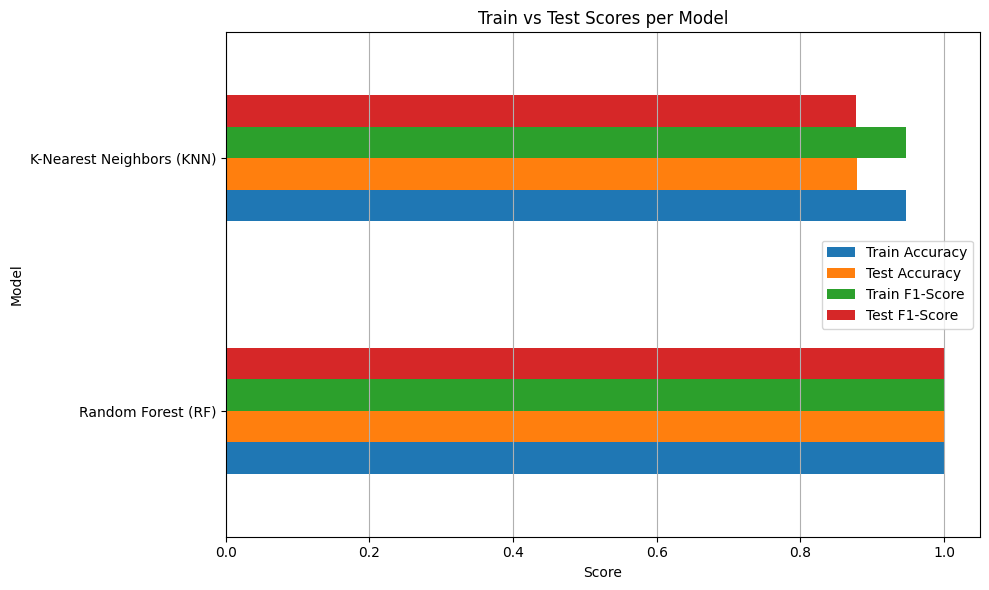

In [25]:
summary_df.set_index('Model')[['Train Accuracy', 'Test Accuracy', 'Train F1-Score', 'Test F1-Score']] \
    .plot(kind='barh', figsize=(10, 6), title='Train vs Test Scores per Model')
plt.xlabel('Score')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


Confusion Matrix for K-Nearest Neighbors (KNN):


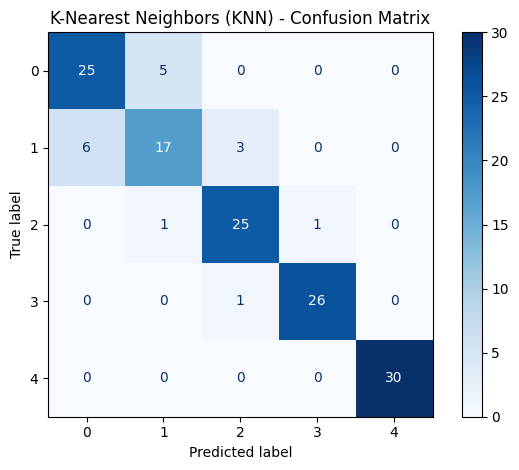


Confusion Matrix for Random Forest (RF):


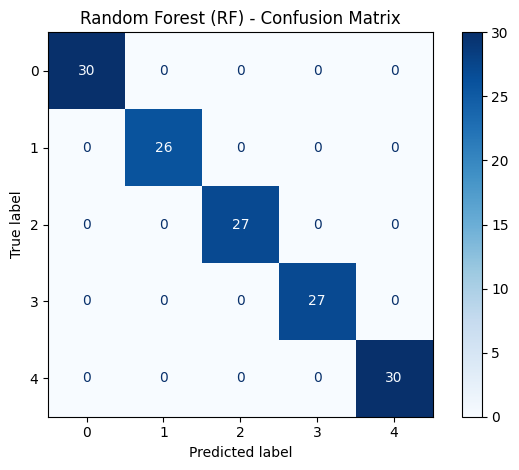

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Buat list model yang ingin dievaluasi lebih lanjut
model_dict = {
    'K-Nearest Neighbors (KNN)': knn_clf,
    'Random Forest (RF)': rf_clf
}

# Plot confusion matrix untuk setiap model
for model_name, model in model_dict.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    print(f"\nConfusion Matrix for {model_name}:")
    disp.plot(cmap='Blues')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.grid(False)
    plt.tight_layout()
    plt.show()

Setelah model dilatih, dilakukan evaluasi untuk mengukur kemampuan generalisasi model terhadap data baru menggunakan dua metrik utama: Accuracy dan F1-Score, baik pada data pelatihan (training) maupun data pengujian (testing).

| Model                     | Train Accuracy | Train F1-Score | Test Accuracy | Test F1-Score |
| ------------------------- | -------------- | -------------- | ------------- | ------------- |
| K-Nearest Neighbors (KNN) | 94.64%         | 94.65%         | 87.86%        | 87.67%        |
| Random Forest (RF)        | 100.00%        | 100.00%        | 100.00%       | 100.00%       |

* K-Nearest Neighbors (KNN):

Memiliki performa cukup baik dan stabil antara training dan testing.
Terdapat penurunan dari training ke testing sebesar ~7%, yang menandakan model masih mengalami sedikit penurunan performa pada data baru, namun tetap wajar.
KNN bekerja dengan baik sebagai model baseline, namun rentan terhadap noise karena sangat bergantung pada distribusi lokal data.

* Random Forest (RF):

Memberikan hasil sempurna (100%) pada seluruh metrik evaluasi, baik di training maupun testing.
Hasil ini menunjukkan bahwa model mampu belajar dan mengeneralisasi dengan sangat baik pada dataset. Namun, hal ini bisa disebabkan oleh:
  * Fitur input yang sangat informatif dan tidak terlalu noisy,
  * Jumlah data yang cukup kecil dan bersih, sehingga mudah dipelajari,
  * Struktur data yang jelas, membuat model tidak kesulitan membedakan antar kelas.

Berdasarkan hal berikut, walaupun model RF unggul dalam tiap metrik, nilai harus diinterpretasikan dengan hati-hati, dikarenakan performa yang tidak akan sempurna untuk dataset lainnya.